<a href="https://colab.research.google.com/github/inefable12/upch_rp_2023/blob/main/Estadistica_Descriptiva_cl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# un número uniformemente distribuido entre 0 y 1
rand = np.random.random()
print(rand)

0.7247443721097115


In [3]:
# generar números con una distribución normal de media  mu  y desviación  sigma
mu = 0.00
sigma = 1.00

randn = np.random.normal(loc = mu, scale = sigma)
print(randn)

-0.6856531873473216


In [4]:
# semilla
np.random.seed(123457)
print(np.random.random())
print(np.random.normal())

0.4347450610414807
-0.003031385471098537


In [5]:
# Distribuciones de variable aleatoria continua
# Cambiar la distribucion aquí y la sintaxis de lo que sigue es la misma

distribucion = stats.norm(loc = 0.00, scale = 1.00) #  Distribución normal
# distribucion = stats.expon(scale = 2.00) #  Distribución exponencial
# distribucion = stats.uniform(scale = 3.00) #  Distribución uniforme

# Generar 10 numeros aleatorios con la distribucion dada (.rvs random variates)
muestra = distribucion.rvs(size = 10)
print('Muestra: {}'.format(muestra))

Muestra: [-0.33496225 -0.8534663   0.51405265 -0.77269685 -2.105874    0.54902703
 -1.69221803  0.11964082  0.32059094  1.17849406]


Cuantil 99%: [-2.5758293035489004, 2.5758293035489004]


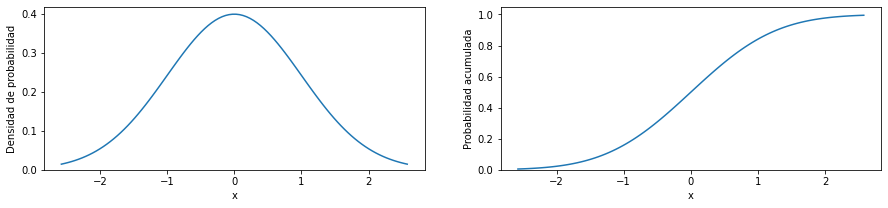

In [6]:
"""
Gráficos de la función densidad y acumulada de probabilidad
"""
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))

# Rango de la variable aleatoria, tomamos un cuantil del 99% 
cuantil_99 = distribucion.interval(0.99)
print('Cuantil 99%: [{}, {}]'.format(*cuantil_99))

# Rango de la variable x 
x = np.linspace(cuantil_99[0], cuantil_99[1], 100)

# .pdf probability density function
densidad_proba = distribucion.pdf(x)
ax[0].plot(x, densidad_proba)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Densidad de probabilidad')
ax[0].set_ylim(bottom = 0)

# .cdf cumulative density function
proba_acumulada = distribucion.cdf(x)
ax[1].plot(x, proba_acumulada)
ax[1].set_xlabel('x')
ax[1].set_ylabel('Probabilidad acumulada')
ax[1].set_ylim([0, 1.05])

plt.show()

In [7]:
# Generemos 1000 datos dados por una distribucion normal
# Por los valores elegidos podría representar la altura de un conjunto de personas adultas.

N = 1000
muestra = stats.norm.rvs(loc = 1.75, scale = 0.15, size = N)
print(muestra)

[1.71421443 1.81275364 1.72926597 1.8433636  1.64304726 1.83829065
 1.40941353 1.60588876 1.84515395 1.6973999  1.96600268 1.57666948
 1.78747804 1.86507443 1.93549358 1.52106684 1.78850044 1.7345313
 1.70828819 1.80526336 1.93533359 1.53848882 1.46611557 1.93293525
 1.33110639 1.48888511 1.73351442 1.53411272 1.53501227 1.5049372
 1.8183274  1.98461396 1.92539651 1.68751729 1.64814537 1.54668259
 1.71261557 1.56612139 1.86111127 1.67142673 1.75675353 1.654013
 1.79049045 1.54754424 1.83608369 1.95946482 1.9087031  1.82974268
 1.92241431 1.69146224 1.70271807 1.59764768 1.64673314 1.68475006
 1.82005267 1.67534251 1.57094675 1.79250497 1.85626146 1.57792177
 1.68358922 1.49976419 1.70871589 1.96647469 2.06943637 1.77282511
 1.81640858 1.69620146 1.85592781 1.78305948 1.64089772 1.82694036
 2.07590708 1.73300245 1.59626955 1.85546184 1.72071971 1.70084158
 1.79022783 1.81928214 1.72761357 1.97997945 1.82746796 1.73976214
 2.09773658 1.56721566 1.80802799 1.93693059 1.91294214 1.85626159

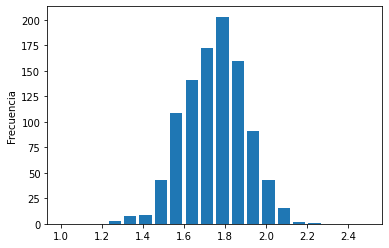

In [8]:
# Los parámetros que seteo en principio son:
# - Número de bins
# - Rango de los datos que voy a representar (sin especificar nada, toma el mínimo y el máximo)
# - rwidth es solo para visualizar, en vez de dibujar toda la barra, la angosta un poquito
plt.hist(muestra, bins = 20, range = [1.00, 2.50], rwidth = 0.80)
plt.ylabel('Frecuencia')
plt.show()

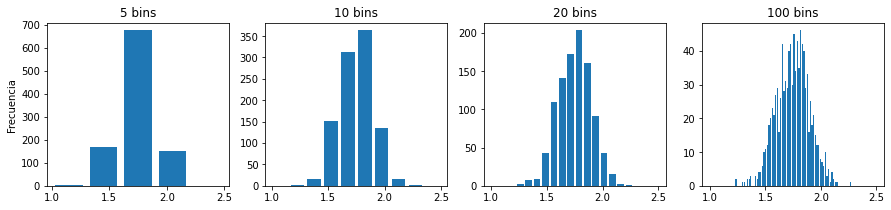

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 3))
fig_index = 0

# Barras en número de bins
for nbins in [5, 10, 20, 100]:

  ax[fig_index].hist(muestra, bins = nbins, range = [1.00, 2.50], rwidth = 0.80)
  ax[fig_index].set_title('{} bins'.format(nbins))
  fig_index += 1

ax[0].set_ylabel('Frecuencia')
plt.show()

#### Observables estadísticos

Además de la visualización, otra forma de cuantificar la distribución es mediante el cálculo de ciertos observables tales como: 

- Media $ \bar X = \frac{1}{N} \sum_i^N X_i $

- Varianza $S^2 = \frac{1}{N-1} \sum_i^N (X_i - \bar X)^2$

- Desviación $S = \sqrt{S^2}$

- Mediana $m$ / $P(X \leq m) = 0.5$

- $\alpha$-cuantil: $c$ / $P(X \leq c) = \alpha$

In [10]:
# Cálculo de los observables con numpy

media = np.mean(muestra)
varianza = np.var(muestra)
desviacion = np.std(muestra)

mediana = np.median(muestra)
cuartiles = np.quantile(muestra, [0.25, 0.50, 0.75])

print('Media = {:.3f}'.format(media))
print('Desviacion = {:.3f}'.format(desviacion))
print('Varianza = {:.3f}'.format(varianza))

print('Mediana = {:.3f}'.format(mediana))
print('Cuartiles 25%, 50%, 75% = {:.3f}, {:.3f}, {:.3f}'.format(*cuartiles))

Media = 1.749
Desviacion = 0.149
Varianza = 0.022
Mediana = 1.756
Cuartiles 25%, 50%, 75% = 1.649, 1.756, 1.846


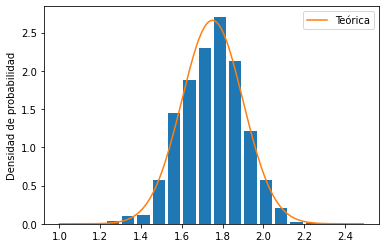

In [12]:
# Density = True -> histograma normalizado
plt.hist(muestra, bins = 20, range = [1.00, 2.50], rwidth = 0.80, density = True)

# Lo comparamos con la distribución teórica (esto es trampa, es muy probable que nunca la sepamos)
x = np.arange(1.00, 2.50, 0.01)
plt.plot(x, stats.norm.pdf(x, loc = 1.75, scale = 0.15), label = 'Teórica')

plt.ylabel('Densidad de probabilidad')
plt.legend(loc = 'best')
plt.show()

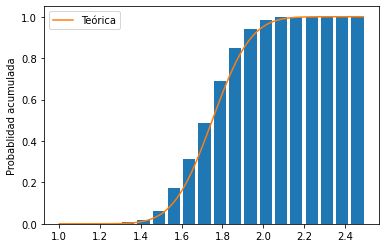

In [13]:
# Cumulative = True -> acumulada
plt.hist(muestra, bins = 20, range = [1.00, 2.50], rwidth = 0.80, density = True, cumulative = True)

x = np.arange(1.00, 2.50, 0.01)
plt.plot(x, stats.norm.cdf(x, loc = 1.75, scale = 0.15), label = 'Teórica')

plt.ylabel('Probablidad acumulada')
plt.legend(loc = 'best')
plt.show()

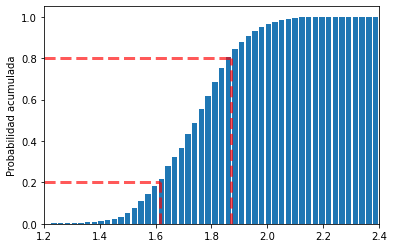

In [14]:
### Visualizacion de los cuantiles
plt.hist(muestra, bins = 50, range = [1.2, 2.4], density = True, cumulative = True, rwidth = 0.80)

# Cambiar aqui lo cuantiles que se quieran visualizar
for c in [0.20, 0.80]:

  plt.hlines(y = c, xmin = 1.2, xmax = np.quantile(muestra, c), linestyle = '--', color = 'r', alpha = 0.65, linewidth = 3)
  plt.vlines(x = np.quantile(muestra, c), ymin = 0.00, ymax = c, linestyles= '--', color = 'r', alpha = 0.65, linewidth = 3)

plt.ylabel('Probabilidad acumulada')
plt.ylim([0.00, 1.05])
plt.xlim([1.2, 2.4])
plt.show()

__Artículo:__

<a href='https://www.nature.com/articles/s41467-020-18963-y#Sec14'>Los cambios en el olfato y el gusto son indicadores tempranos de la pandemia de COVID-19 y la efectividad de las decisiones políticas</a>

In [15]:
pathurl='https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-020-18963-y/MediaObjects/41467_2020_18963_MOESM4_ESM.xlsx'
df = pd.read_excel(pathurl)

In [16]:
df.head()  # muestra

,X1,GCCR,Year_of_birth,Country_of_Residence,City_of_Residence,Gender,Respiratory_Illness_y/n,Date_of_onset,COVID_diagnosis,Symptoms_changes_in_food_flavor,Symptoms_changes_in_smell,Comment_-_symptom_progression,Smell_before_illness,Smell_during_illness,Taste_before_illness,Taste_during_illness,DifferenceS,DifferenceT
0,17,1,1959,united kingdom,NaN,0,1,3/12/20 0:00,1,1,1,smell loss first,62.9,0.5,96.2,0.7,62.4,95.5
1,36,1,1990,France,Montpellier,1,1,3/21/20 0:00,2,1,1,NaN,81.9,0.9,88.9,22.0,81.0,66.9
2,39,1,1964,Uk,London,1,1,4/1/20 0:00,4,1,1,Fever overnight. Profound fatigue. Fever laste...,99.2,5.7,100.0,12.0,93.5,88.0
3,40,1,1972,Uk,Burton on Trent,0,1,3/17/20 0:00,4,1,1,"Sore, dry throat, breathlessness, headache, fa...",100.0,0.5,100.0,0.0,99.5,100.0
4,42,1,1963,Uk,London,0,1,3/5/20 0:00,2,1,1,Slight wheeze and mild dry cough for a week. F...,98.8,3.0,97.3,3.6,95.8,93.7


In [17]:
df.shape  # dimensiones

(7929, 18)

In [18]:
df.dtypes  # tipo de datos de las variables

X1                                   int64
GCCR                                 int64
Year_of_birth                        int64
Country_of_Residence                object
City_of_Residence                   object
Gender                               int64
Respiratory_Illness_y/n              int64
Date_of_onset                       object
COVID_diagnosis                      int64
Symptoms_changes_in_food_flavor      int64
Symptoms_changes_in_smell            int64
Comment_-_symptom_progression       object
Smell_before_illness               float64
Smell_during_illness               float64
Taste_before_illness               float64
Taste_during_illness               float64
DifferenceS                        float64
DifferenceT                        float64
dtype: object

In [19]:
df.columns = map(str.lower, df.columns)

In [20]:
# seleccionar variables con tipo de datos numericos
df.select_dtypes(np.number).dtypes

x1                                   int64
gccr                                 int64
year_of_birth                        int64
gender                               int64
respiratory_illness_y/n              int64
covid_diagnosis                      int64
symptoms_changes_in_food_flavor      int64
symptoms_changes_in_smell            int64
smell_before_illness               float64
smell_during_illness               float64
taste_before_illness               float64
taste_during_illness               float64
differences                        float64
differencet                        float64
dtype: object

In [21]:
# tipos de datos flotantes
df.select_dtypes('float').head()

,smell_before_illness,smell_during_illness,taste_before_illness,taste_during_illness,differences,differencet
0,62.9,0.5,96.2,0.7,62.4,95.5
1,81.9,0.9,88.9,22.0,81.0,66.9
2,99.2,5.7,100.0,12.0,93.5,88.0
3,100.0,0.5,100.0,0.0,99.5,100.0
4,98.8,3.0,97.3,3.6,95.8,93.7


In [22]:
# tipos de datos enteros
df.select_dtypes('int').head()

,x1,gccr,year_of_birth,gender,respiratory_illness_y/n,covid_diagnosis,symptoms_changes_in_food_flavor,symptoms_changes_in_smell
0,17,1,1959,0,1,1,1,1
1,36,1,1990,1,1,2,1,1
2,39,1,1964,1,1,4,1,1
3,40,1,1972,0,1,4,1,1
4,42,1,1963,0,1,2,1,1


In [23]:
# excluir tipos de datos
df.select_dtypes(exclude='float').dtypes

x1                                  int64
gccr                                int64
year_of_birth                       int64
country_of_residence               object
city_of_residence                  object
gender                              int64
respiratory_illness_y/n             int64
date_of_onset                      object
covid_diagnosis                     int64
symptoms_changes_in_food_flavor     int64
symptoms_changes_in_smell           int64
comment_-_symptom_progression      object
dtype: object

In [ ]:
# otros argumentos: 'category', 'datetime'

In [24]:
df_num = df.select_dtypes(np.number)  # exclude = 'object'

In [25]:
df_num.head()

,x1,gccr,year_of_birth,gender,respiratory_illness_y/n,covid_diagnosis,symptoms_changes_in_food_flavor,symptoms_changes_in_smell,smell_before_illness,smell_during_illness,taste_before_illness,taste_during_illness,differences,differencet
0,17,1,1959,0,1,1,1,1,62.9,0.5,96.2,0.7,62.4,95.5
1,36,1,1990,1,1,2,1,1,81.9,0.9,88.9,22.0,81.0,66.9
2,39,1,1964,1,1,4,1,1,99.2,5.7,100.0,12.0,93.5,88.0
3,40,1,1972,0,1,4,1,1,100.0,0.5,100.0,0.0,99.5,100.0
4,42,1,1963,0,1,2,1,1,98.8,3.0,97.3,3.6,95.8,93.7


In [26]:
df_obj = df.columns[df.dtypes == 'object']

In [27]:
list(df_obj)

['country_of_residence',
 'city_of_residence',
 'date_of_onset',
 'comment_-_symptom_progression']

In [28]:
df_num.drop(['x1', 'year_of_birth'], 1, inplace=True)

In [29]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7929 entries, 0 to 7928
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gccr                             7929 non-null   int64  
 1   gender                           7929 non-null   int64  
 2   respiratory_illness_y/n          7929 non-null   int64  
 3   covid_diagnosis                  7929 non-null   int64  
 4   symptoms_changes_in_food_flavor  7929 non-null   int64  
 5   symptoms_changes_in_smell        7929 non-null   int64  
 6   smell_before_illness             7905 non-null   float64
 7   smell_during_illness             7929 non-null   float64
 8   taste_before_illness             7791 non-null   float64
 9   taste_during_illness             7805 non-null   float64
 10  differences                      7905 non-null   float64
 11  differencet                      7786 non-null   float64
dtypes: float64(6), int64

In [30]:
df_num.describe()

,gccr,gender,respiratory_illness_y/n,covid_diagnosis,symptoms_changes_in_food_flavor,symptoms_changes_in_smell,smell_before_illness,smell_during_illness,taste_before_illness,taste_during_illness,differences,differencet
count,7929.000000,7929.000000,7929.0,7929.000000,7929.000000,7929.000000,7905.000000,7929.000000,7791.000000,7805.000000,7905.00000,7786.000000
mean,1.309623,0.316686,1.0,2.881448,0.868962,0.958002,90.277495,7.762517,91.625119,20.657937,82.53007,70.963845
std,0.462367,0.478578,0.0,1.806430,0.337463,0.200597,14.597196,17.523245,12.394096,26.647381,23.27199,29.776721
min,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-75.70000,-100.000000
25%,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,85.100000,0.000000,87.300000,0.600000,76.40000,55.500000
50%,1.000000,0.000000,1.0,3.000000,1.000000,1.000000,96.900000,0.800000,96.900000,8.900000,90.90000,80.900000
75%,2.000000,1.000000,1.0,4.000000,1.000000,1.000000,100.000000,6.000000,100.000000,29.900000,99.10000,95.200000
max,2.000000,3.000000,1.0,8.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000


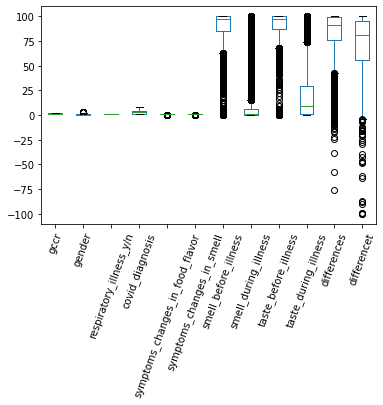

In [31]:
ax = df_num.boxplot()
ax.tick_params(axis='x', rotation=70)
plt.grid()
plt.show()

In [32]:
df_float = df.select_dtypes('float')

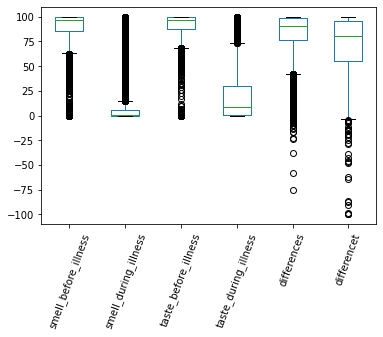

In [33]:
ax = df_float.boxplot()
ax.tick_params(axis='x', rotation=70)
plt.grid()
plt.show()

In [34]:
df_int = df.select_dtypes('int')

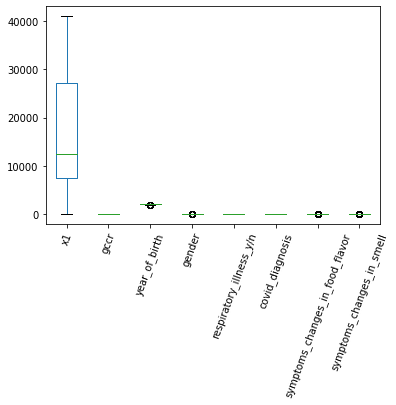

In [35]:
ax = df_int.boxplot()
ax.tick_params(axis='x', rotation=70)
plt.grid()
plt.show()

In [36]:
df['age'] = 2021 - df['year_of_birth']  # variable edad

In [37]:
df.head()

,x1,gccr,year_of_birth,country_of_residence,city_of_residence,gender,respiratory_illness_y/n,date_of_onset,covid_diagnosis,symptoms_changes_in_food_flavor,symptoms_changes_in_smell,comment_-_symptom_progression,smell_before_illness,smell_during_illness,taste_before_illness,taste_during_illness,differences,differencet,age
0,17,1,1959,united kingdom,NaN,0,1,3/12/20 0:00,1,1,1,smell loss first,62.9,0.5,96.2,0.7,62.4,95.5,62
1,36,1,1990,France,Montpellier,1,1,3/21/20 0:00,2,1,1,NaN,81.9,0.9,88.9,22.0,81.0,66.9,31
2,39,1,1964,Uk,London,1,1,4/1/20 0:00,4,1,1,Fever overnight. Profound fatigue. Fever laste...,99.2,5.7,100.0,12.0,93.5,88.0,57
3,40,1,1972,Uk,Burton on Trent,0,1,3/17/20 0:00,4,1,1,"Sore, dry throat, breathlessness, headache, fa...",100.0,0.5,100.0,0.0,99.5,100.0,49
4,42,1,1963,Uk,London,0,1,3/5/20 0:00,2,1,1,Slight wheeze and mild dry cough for a week. F...,98.8,3.0,97.3,3.6,95.8,93.7,58


In [38]:
# Edades de los participantes del experimento
edades = df['age']

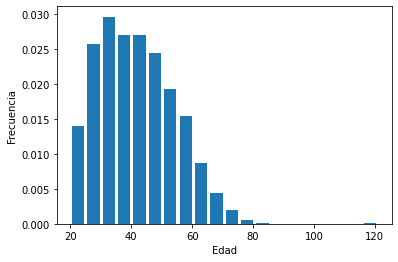

Media: 42.072392
Varianza: 150.634
Desviacion: 12.273
90% central: 25.0 - 64.0
Mediana: 41.0
Moda: [35]


In [39]:
# Histograma
ax = edades.hist(bins = 20, grid = False, rwidth = 0.80, 
                 cumulative = False, density = True)
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
plt.show()

# Observables
print('Media: {:3f}'.format(edades.mean()))
print('Varianza: {:.3f}'.format(edades.var()))
print('Desviacion: {:.3f}'.format(edades.std()))
print('90% central: {} - {}'.format(*edades.quantile([0.05, 0.95])))
print('Mediana: {}'.format(edades.median()))
print('Moda: {}'.format(edades.mode().values))

In [40]:
df_smell_taste = df.loc[:,['smell_before_illness', 'smell_during_illness',
                       'taste_before_illness', 'taste_during_illness']]

In [41]:
df_smell_taste.head()

,smell_before_illness,smell_during_illness,taste_before_illness,taste_during_illness
0,62.9,0.5,96.2,0.7
1,81.9,0.9,88.9,22.0
2,99.2,5.7,100.0,12.0
3,100.0,0.5,100.0,0.0
4,98.8,3.0,97.3,3.6


In [42]:
smell_taste = ['smell_before_illness', 'smell_during_illness',
                       'taste_before_illness', 'taste_during_illness']

In [43]:
for p in smell_taste:
  print(p)
  print('Media: {:3f}'.format(df_smell_taste[p].mean()))
  print('Desviacion: {:.3f}'.format(df_smell_taste[p].std()))
  print('90% central: {} - {}'.format(*df_smell_taste[p].quantile([0.05, 0.95])))
  print('Mediana: {}'.format(df_smell_taste[p].median()))
  print('Moda: {}'.format(df_smell_taste[p].mode().values))
  print('\n')

smell_before_illness
Media: 90.277495
Desviacion: 14.597
90% central: 64.7 - 100.0
Mediana: 96.9
Moda: [100.]


smell_during_illness
Media: 7.762517
Desviacion: 17.523
90% central: 0.0 - 45.65999999999995
Mediana: 0.8
Moda: [0.]


taste_before_illness
Media: 91.625119
Desviacion: 12.394
90% central: 70.05 - 100.0
Mediana: 96.9
Moda: [100.]


taste_during_illness
Media: 20.657937
Desviacion: 26.647
90% central: 0.0 - 82.4
Mediana: 8.9
Moda: [0.]




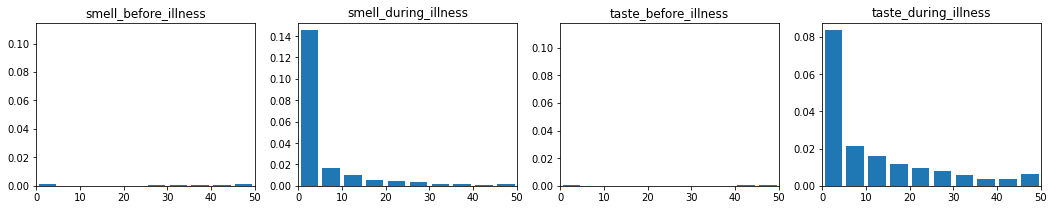

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize = (18, 3))
for i in range(len(smell_taste)):
  ax[i].hist(df_smell_taste[smell_taste[i]], bins = 20, rwidth = 0.80, density = True)
  ax[i].set_title(smell_taste[i])
  ax[i].set_xlim([0, 50])
plt.show()

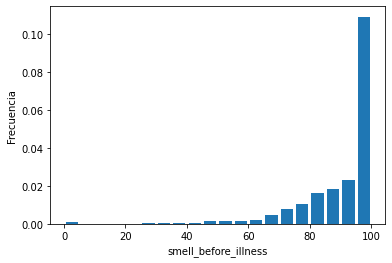

In [45]:
ax = df['smell_before_illness'].hist(bins = 20, grid = False, rwidth = 0.80, 
                                     cumulative = False, density = True)
ax.set_xlabel('smell_before_illness')
ax.set_ylabel('Frecuencia')
plt.show()

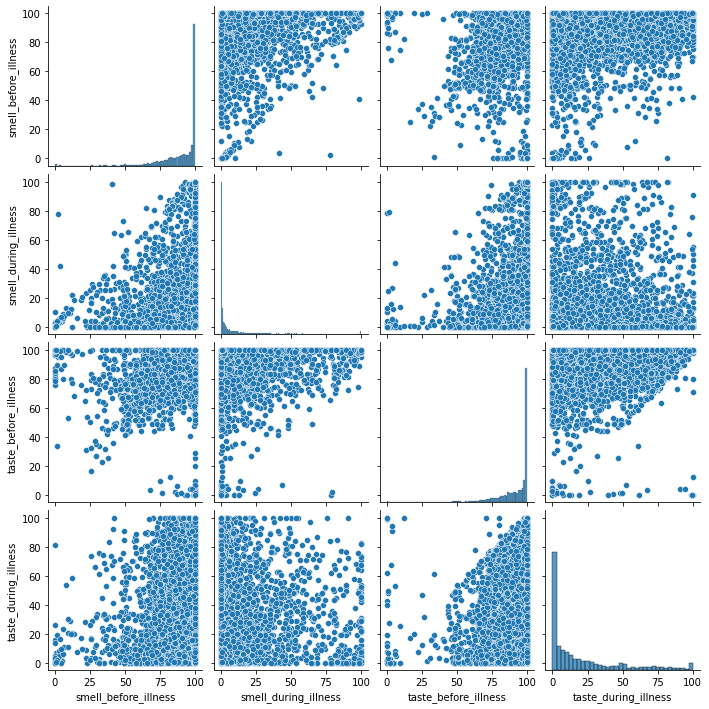

In [46]:
sns.pairplot(df_smell_taste)
# to show
plt.show()

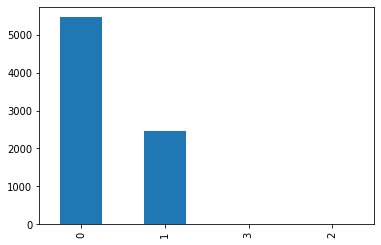

In [47]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

<Axes: ylabel='count'>

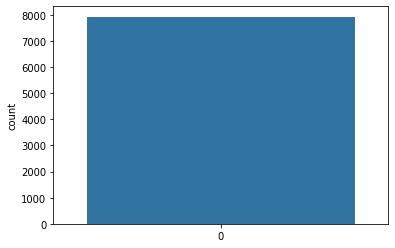

In [48]:
sns.countplot(df['gender'])